# <span style="color:blue">**Capítulo 8**</span>
## <font color=blue size=8>*Support Vector Machines*</font>
### Un algoritmo de aprendizaje supervisado para clasificación y regresión  

 Las máquinas de vectores de soporte ó *support vector machines*, también llamadas SVM, es uno de los algoritmos
 más utilizados para clasificación; también puede usarse para resolver problemas de regresión.  

## En Pocas Palabras 

*SVM* es un algoritmo de aprendizaje supervisado potente y flexible, utilizado con mayor frecuencia para clasificación. Encuentra un hiperplano óptimo para dividir el conjunto de datos en dos o más clases (grupos). Una vez que se determina un hiperplano, será más fácil ubicar un punto de datos no visto en una de estas regiones.  

Para entender cómo se determina el hiperplano, explicaré el funcionamiento de *SVM*.

## Funcionamiento de SVM 

Comencemos con un caso trivial de separación de datos entre dos clases. La figura 8.1 muestra tres hiperplanos que separan un conjunto de puntos de datos en dos clases diferentes. El algoritmo *SVM* seleccionará el hiperplano marcado con el margen máximo como la frontera de separación.  

<div>
  <img src="content/fig8.1.png" width="450"/>
</div>

<p style="color:blue; margin-top: 5px; font-weight: bold;">Fig. 8.1</p>

<p>Determinación del hiperplano óptimo.</p>

Permíteme definir algunos términos técnicos utilizados en *SVM*:  
- **Hiperplano**: Es una frontera de decisión o un plano que ayuda a clasificar puntos de datos. Dependiendo de qué lado del hiperplano se encuentre un punto, se determina su clase. Para un conjunto de datos que tiene solo dos clases, el hiperplano puede ser una línea simple. Para conjuntos de datos con múltiples clases, puede ser un hiperplano en un espacio n-dimensional.  
- **Vectores de soporte**: Son los puntos de datos más cercanos al hiperplano. Afectan la posición del hiperplano y, por lo tanto, se denominan vectores de soporte. Basado en esto, el algoritmo para determinar el hiperplano se llama *support vector machine (SVM)*.  
- **Margen**: El margen es la distancia entre el hiperplano y los vectores de soporte. El algoritmo siempre elige el hiperplano que maximiza el margen.

Ahora, el margen puede ser duro o blando:  
- **Margen duro**: cuando el conjunto de datos de entrenamiento es linealmente separable, se pueden dibujar dos líneas paralelas, como se muestra en la figura. A esto lo llamamos margen duro.  
- **Margen blando**: cuando el conjunto de datos no es completamente separable linealmente, *SVM* permite cierta violación del margen, como se muestra en la figura 8.2. Observa que algunos puntos de datos están en el lado incorrecto del hiperplano o entre el margen y el hiperplano. A esto lo llamamos margen blando.  

Después de determinar el hiperplano, podemos clasificar un punto de datos no visto como una de las clases conocidas dependiendo de qué lado del hiperplano se encuentre.  

Ahora, veamos los tipos de hiperplanos.

<div>
  <img src="content/fig8.2.png" width="450"/>
</div>

<p style="color:blue; margin-top: 5px; font-weight: bold;">Fig. 8.2</p>

<p>Determinación del hiperplano óptimo.</p>

# Tipos de Hiperplanos  
Los hiperplanos pueden ser una línea recta simple o un plano complejo en un espacio n-dimensional.  
Un hiperplano lineal y uno no lineal en dos dimensiones se pueden ver en la figura 8.3.

<div>
  <img src="content/fig8.3.png" width="650"/>
</div>

<p style="color:blue; margin-top: 5px; font-weight: bold;">Fig. 8.3</p>

<p>Hiperplanos lineales/no lineales.</p>

Imagina que en tres o más dimensiones, el hiperplano podría ser una superficie compleja. Algunos de estos hiperplanos en conjuntos de datos multidimensionales se muestran en la figura 8.4. 

<div>
  <img src="content/fig8.4.png" width="650"/>
</div>

<p style="color:blue; margin-top: 5px; font-weight: bold;">Fig. 8.4</p>

<p>Hiperplanos tridimensionales.</p>

Puedes entender que el cálculo de un hiperplano es la tarea más compleja que debe realizar el algoritmo. Afortunadamente, los implementadores han hecho un gran trabajo con las matemáticas complejas; como científicos de datos, nuestro trabajo es simplemente aceptar sus resultados y usar el hiperplano proporcionado por ellos para clasificar un punto de datos no visto.  

Las matemáticas complejas usan un “kernel” para crear una frontera de decisión óptima. Como científicos de datos, sin profundizar en la matemática del kernel, veamos los diferentes *kernels* que han sido proporcionados y sus efectos en nuestro conjunto de datos. Ilustraré esto con fragmentos de código.

## Efectos del Kernel

Usaré el ampliamente utilizado conjunto de datos *iris* para mostrar el efecto de diferentes *kernels* en la clasificación de los pétalos. El conjunto de datos está provisto en la biblioteca *sklearn* y se carga en tu proyecto usando las siguientes líneas de código:

In [210]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

In [211]:
iris = datasets.load_iris()

Al aplicar el *SVC* (*support vector classifier*), especificaremos qué *kernel* usar. Hay cuatro tipos de *kernel* definidos en la biblioteca *sklearn*.
- Lineal
- Polinomial
- Función de base radial
- Sigmoideo

La biblioteca *sklearn* proporciona la implementación de un algoritmo de clasificador de vectores de soporte en la clase `SVC`. La llamas usando las siguientes dos líneas de código:

In [212]:
# svc = svm.SVC(kernel='linear')
# svc.fit(X, y)

Para especificar un tipo diferente de *kernel*, simplemente cambia el valor del parámetro `kernel` en la declaración anterior. Los valores posibles son:
- `linear`
- `poly`
- `rbf`
- `sigmoid`

Ahora describiré cada uno de estos *kernels*.

In [213]:
X = iris.data[:, :2]#feature
y = iris.target#target

In [214]:
def plotSVC(title):
    # create a mesh to plot in
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    h = (x_max / x_min)/100
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.summer, alpha=0.8)#setting contours
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.rainbow)#plotting scatter plot
    plt.xlabel('Largo del Sépalo')#x-axis label
    plt.ylabel('Ancho del Sépalo')#y-axis label
    plt.xlim(xx.min(), xx.max())#setting limiting bounds
    plt.title(title) #title 
    plt.show()

### Kernel Lineal

Esto se usa cuando tu conjunto de datos es linealmente separable. Matemáticamente, se representa como:

$$
K(x, y) = \sum x \cdot y
$$

donde $x$ y $y$ son dos vectores. 

Usarás este *kernel* por su rápido entrenamiento en muchas características. El entrenamiento es más rápido que otros *kernels* ya que usa solo el parámetro de regularización $C$ para la optimización, mientras que los otros usan el parámetro *gamma*. Explicaré los parámetros de regularización en la siguiente sección “Ajuste de parámetros”.

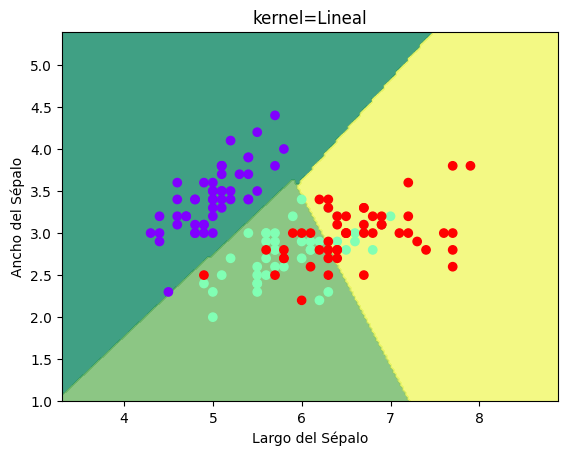

In [215]:
svc = svm.SVC(kernel='linear')
svc.fit(X, y)
plotSVC('kernel=' + str('Lineal'))

### Kernel Polinomial

Esta es una forma generalizada del *linear kernel* que clasificará los conjuntos de datos no lineales.  
Matemáticamente, se representa como:

$$K(x, y) = (x^T y + c)^d$$

donde $x$ y $y$ son los dos vectores, la constante $c$ permite un equilibrio entre términos de mayor y menor dimensión, y $d$ es el orden del núcleo.

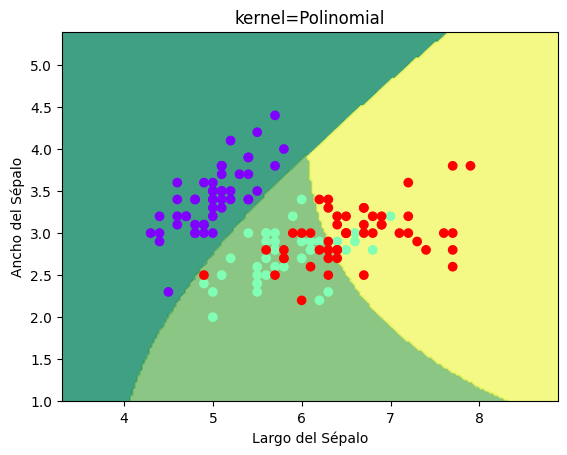

In [216]:
svc = svm.SVC(kernel='poly')
svc.fit(X, y)
plotSVC('kernel=' + str('Polinomial'))

### Función de Base Radial

Esto también se conoce como el *Gaussian kernel* y es el más utilizado. Tiene la capacidad de mapear los datos de entrada en espacios de alta dimensión indefinidos.  
Matemáticamente, se representa como:

$$K(x, y) = \exp\left(-\gamma \sum (x - y)^2\right)$$

donde $x$ y $y$ son los dos vectores y $\gamma$ es un parámetro de ajuste con un rango de 0 a 1.

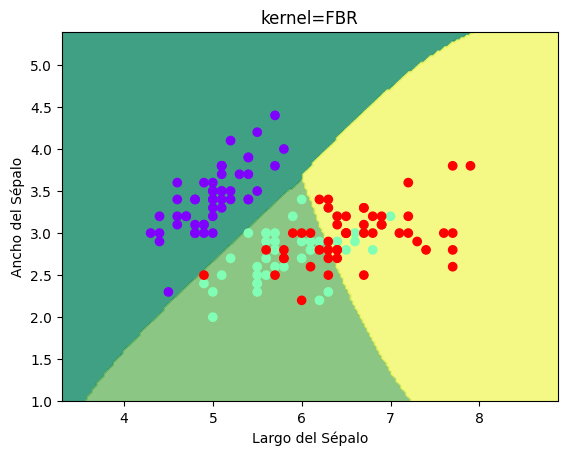

In [217]:
svc = svm.SVC(kernel='rbf')
svc.fit(X, y)
plotSVC('kernel=' + str('FBR'))

### Sigmoide

Esto es equivalente a la función de activación sigmoide utilizada en redes neuronales artificiales. Solo produce valores 0 y 1, por lo que se utiliza únicamente para clasificación binaria.  
Matemáticamente se representa como:

$$K(x, y) = \tanh(\gamma \, x^T y + r)$$

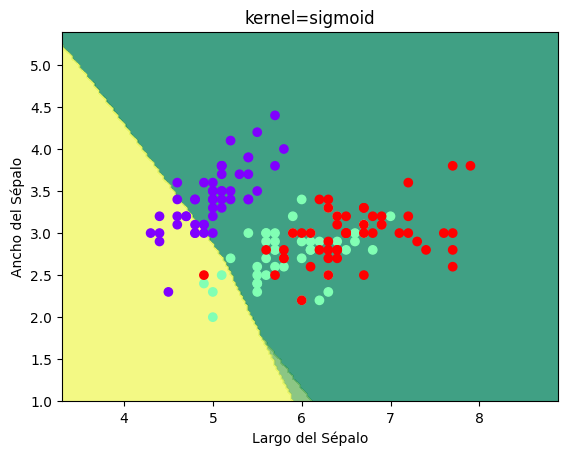

In [218]:
svc = svm.SVC(kernel='sigmoid')
svc.fit(X, y)
plotSVC('kernel=' + str('sigmoid'))

### Directrices para la Selección de Núcleo

Como científico de datos, necesita decidir qué *kernel* aplicar a su conjunto de datos.  
Le proporcionaré algunas directrices que le ayudarán a tomar esta decisión.  

Como ha visto, los tres *kernels* —*linear*, polinómico y de función de base radial— difieren en su enfoque matemático al crear hiperplanos. Los *kernels* lineal y polinómico tienen tiempos de entrenamiento menores a costa de precisión. El *kernel* de función de base radial es más preciso, pero requiere tiempos de entrenamiento más largos. Por lo tanto, la decisión sobre qué *kernel* usar dependerá de la complejidad de su conjunto de datos y de la precisión deseada.  

Si, por examen o conocimiento del dominio, sabe que su conjunto de datos es linealmente separable, use un *linear kernel* ya que requiere poco tiempo de entrenamiento. Si sabe que su conjunto de datos es no lineal, use el polinómico para un entrenamiento más rápido, aunque con menor precisión que el *rbf*. Use *rbf* en sus conjuntos de datos no lineales para una mejor precisión, a costa de tiempos de entrenamiento más altos.  

La llamada a la función *SVC*, además del parámetro *kernel*, también toma algunos parámetros con valores predeterminados. Al aplicar *SVC* a su conjunto de datos, también puede interesarle conocer el efecto de estos parámetros para ajustar finamente el modelo. A continuación, discutiré algunos de los parámetros importantes en la llamada a *SVC*.

## Ajuste de Parámetros

Discutiré los cuatro parámetros:  

- `C`  
- `degree`  
- `gamma`  
- `decision_function_shape`

### El Parámetro C 

Este es un parámetro de tipo *float* con un valor predeterminado de 1.0. Usamos este valor en la regularización, que es una técnica utilizada para reducir los errores y evitar el sobreajuste. La intensidad de la regularización es inversamente proporcional al valor de `C`. El valor de `C` debe ser estrictamente positivo. La penalización es *l2 squared*.  
El siguiente fragmento de código muestra el efecto de varios valores de `C` en nuestro conjunto de datos:

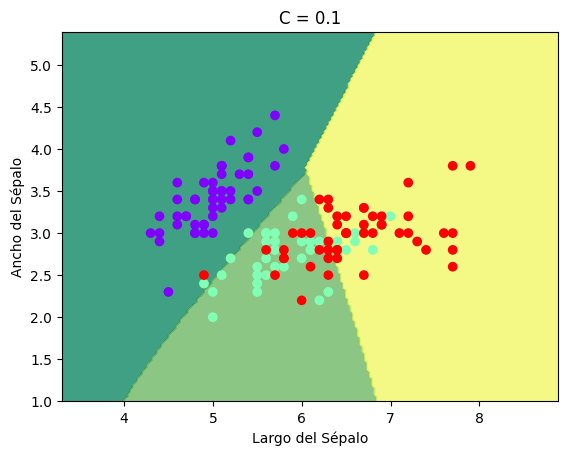

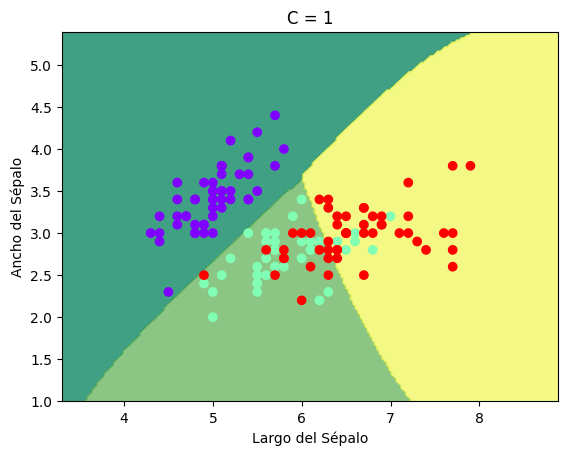

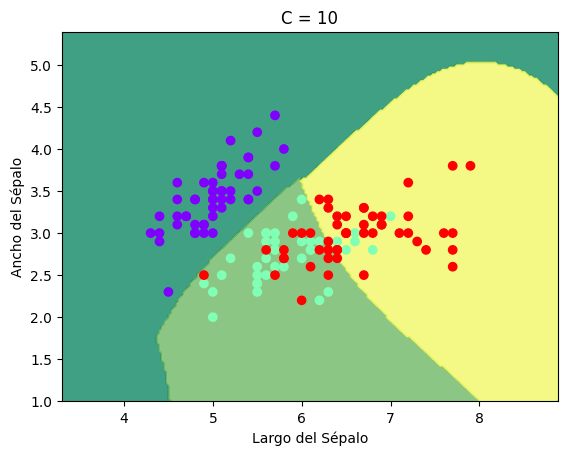

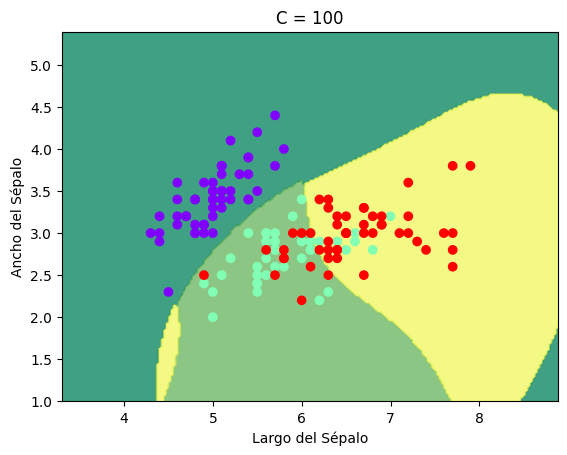

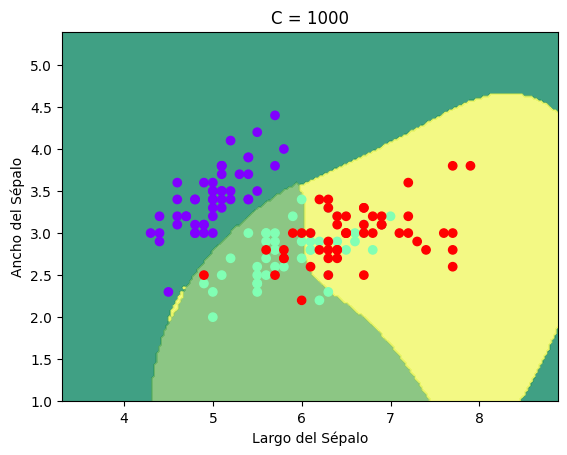

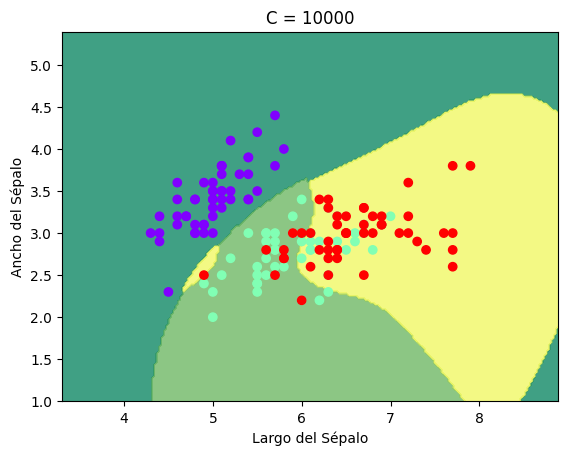

In [219]:
C_values = [0.1, 1, 10, 100, 1000, 10000]
for ci in C_values:
    svc = svm.SVC(kernel='rbf', C=ci)
    svc.fit(X, y)
    plotSVC('C = ' + str(ci))

<p style="color:blue; margin-top: 5px; font-weight: bold;">Fig. 8.6</p>

<p>Hiperplanos para diferentes valores de C.</p>


Los hiperplanos generados para distintos valores de `C` se pueden ver en la figura 8.6. Observe cómo los contornos y, por lo tanto, las regiones cambian con el aumento del valor del parámetro `C`.

### El Parámetro Degree

Este es un parámetro de tipo *int* con un valor predeterminado de 3. Aplicamos este parámetro únicamente en el *polynomial kernel* y define el grado del polinomio utilizado en el cálculo. Si especifica este parámetro para otros *kernels*, se ignorará su valor. Usar un valor mayor para este parámetro aumentará los tiempos de entrenamiento.  
El siguiente fragmento de código ilustra el efecto de diferentes valores en el grado:  

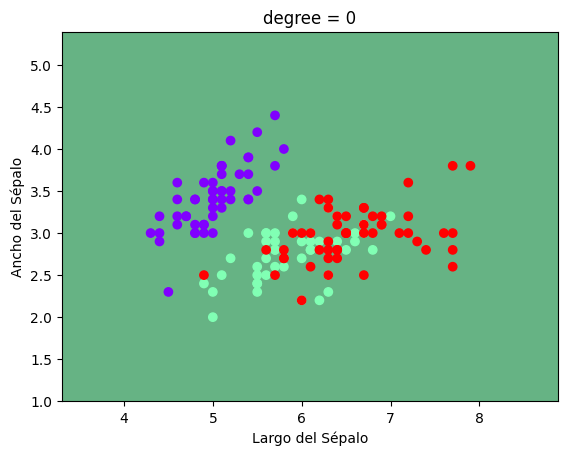

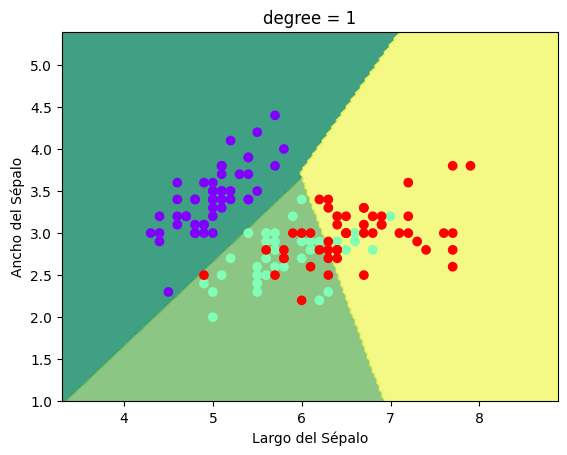

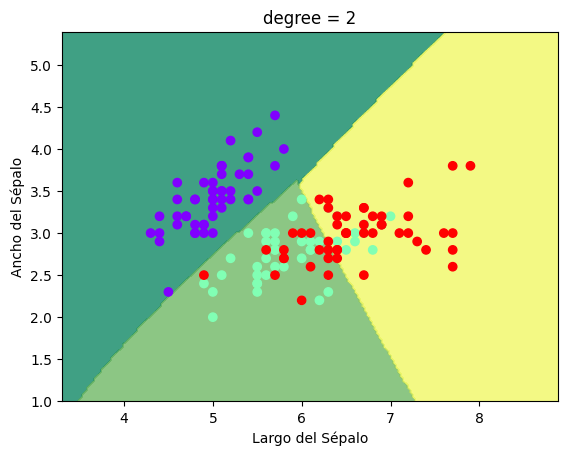

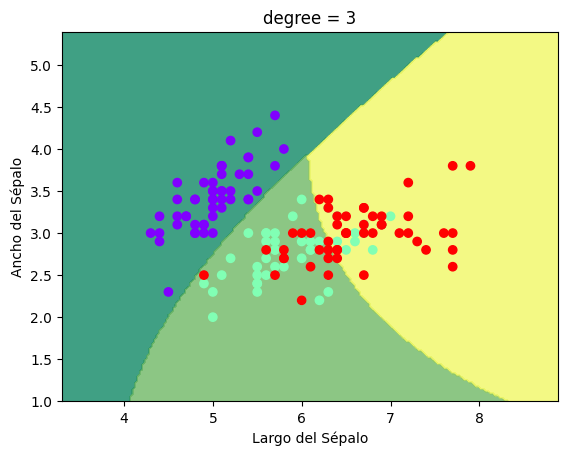

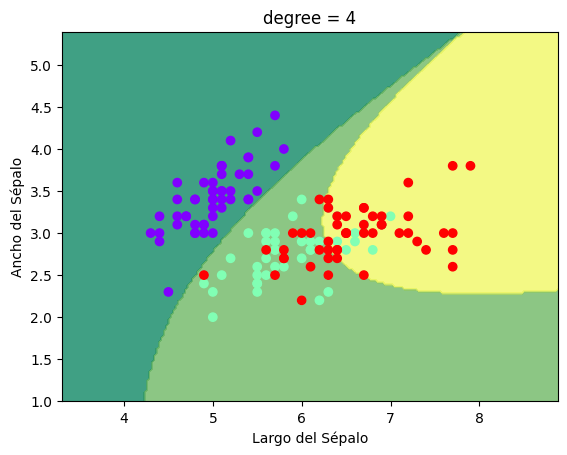

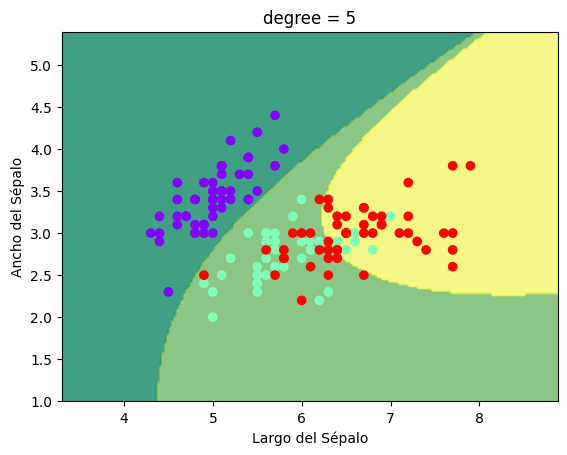

In [220]:
D = [0, 1, 2, 3, 4, 5]
for degree in D:
    svc = svm.SVC(kernel='poly', degree=degree)
    svc.fit(X, y)
    plotSVC('degree = ' + str(degree))

<p style="color:blue; margin-top: 5px; font-weight: bold;">Fig. 8.7</p>

<p>Hiperplanos para diferentes degrees (grados)</p>


Los hiperplanos generados para distintos grados se pueden ver en la figura 8.7. Nuevamente, observe cómo cambia el hiperplano con el valor del grado. Note que para un grado igual a cero, no se obtiene ningún hiperplano.

### El Parámetro Gamma

Este es un parámetro de tipo *float*, y podemos especificar su valor como `scale` o `auto`. El valor predeterminado es `scale`. Este parámetro determina cuánta curvatura queremos en un límite de decisión. Para el valor predeterminado `scale`, se establece $\gamma$ como: gamma = 1 / (n_features * X.var()), mientras que para `auto` se establece como: gamma = 1 / n_features.
La figura 8.8 muestra el efecto de $\gamma$.

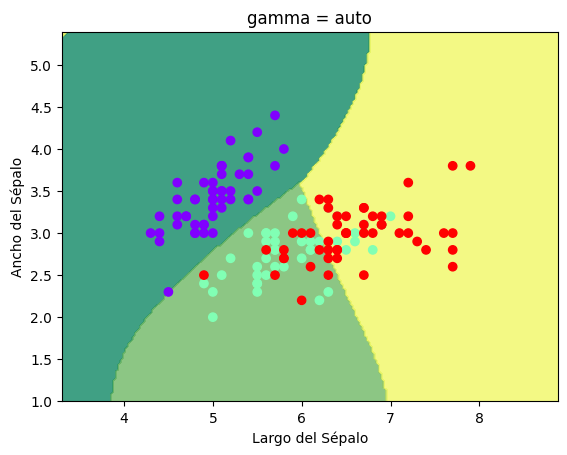

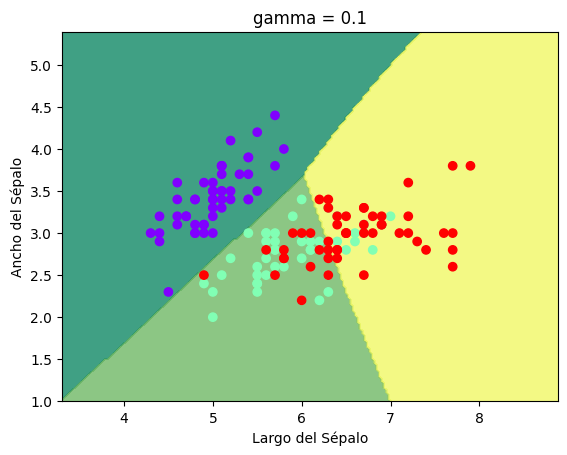

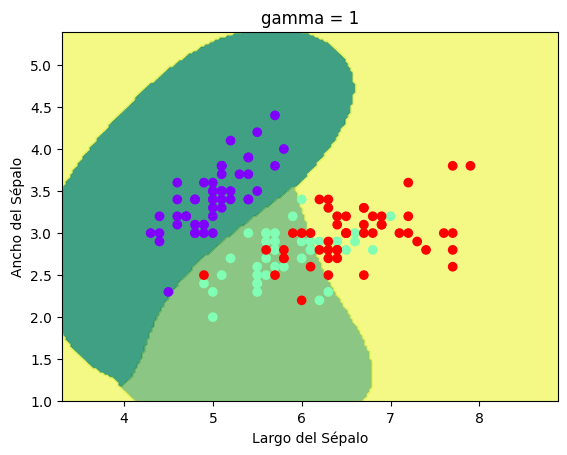

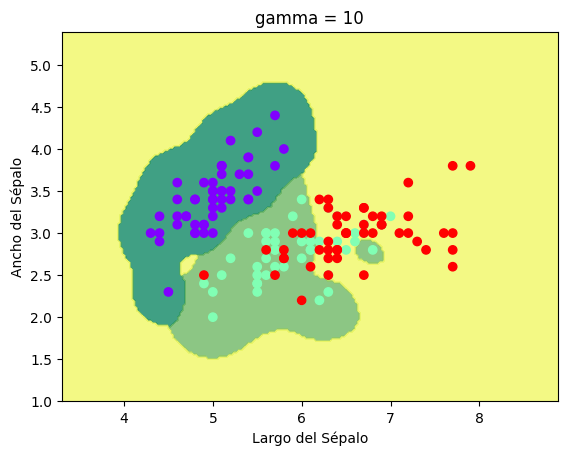

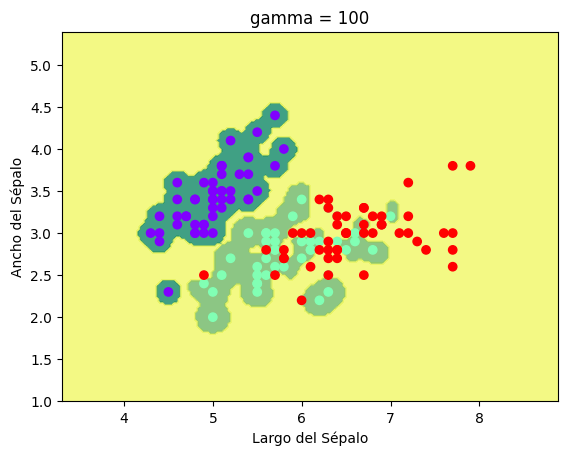

In [221]:
G = ['auto',0.1, 1, 10, 100]#setting different Gamma values for RBF kernel
for gamma in G:#looping each value from the list 
    svc = svm.SVC(kernel='rbf', gamma=gamma)
    svc.fit(X, y)
    plotSVC('gamma = ' + str(gamma))

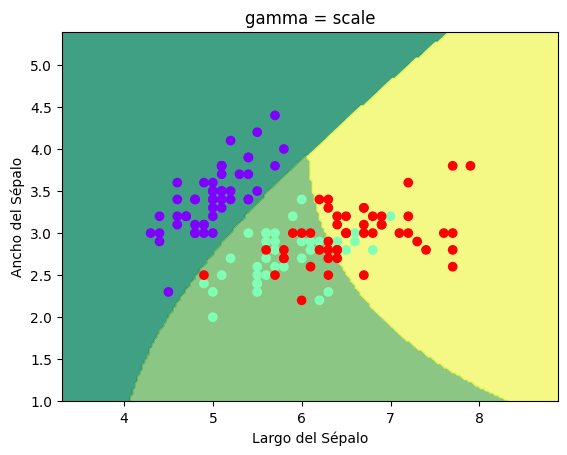

In [222]:
svc = svm.SVC(kernel='poly', gamma='scale')
svc.fit(X, y)
plotSVC('gamma = ' + 'scale')

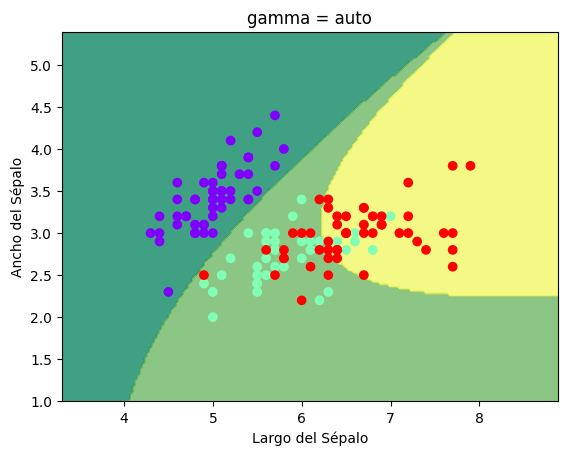

In [223]:
svc = svm.SVC(kernel='poly', gamma='auto')
svc.fit(X, y)
plotSVC('gamma = ' + 'auto')

<p style="color:blue; margin-top: 5px; font-weight: bold;">Fig. 8.8</p>

<p>Hiperplanos para distintos gamma.</p>

### El Parámetro decision_function_shape

Este parámetro toma uno de los dos valores: `ovo` (*one-vs-one*) o `ovr` (*one-vs-rest*). El valor predeterminado es `ovr`. `ovo` utiliza la forma `(n_samples, n_classes * (n_classes - 1) / 2)`. `ovr` utiliza la forma `(n_samples, n_classes)`.  

`ovo` se usa para clasificación multiclase y se ignora en el caso de clasificación binaria.  
`ovr` es un método que aplica algoritmos de clasificación binaria a un conjunto de datos multiclase. Todo el conjunto multiclase se divide en múltiples problemas de clasificación binaria. Luego, entrenamos un clasificador binario en cada uno de estos problemas divididos. La clasificación final se realiza según el modelo que otorgó la mayor confianza.  

Al igual que `ovr`, `ovo` divide un conjunto multiclase en problemas de clasificación binaria. Sin embargo, a diferencia de `ovr`, que divide el conjunto en un conjunto binario para cada clase, `ovo` lo divide en un conjunto para cada clase contra todas las demás clases. 

La figura 8.9 muestra la salida para los dos diferentes valores de la función de decisión.  
A continuación, presentaré un caso práctico del uso del algoritmo *SVM*.

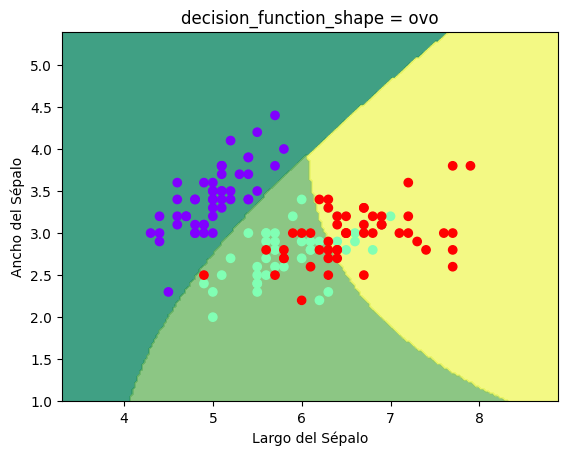

In [224]:
svc = svm.SVC(kernel='poly', decision_function_shape='ovo')
svc.fit(X, y)
plotSVC('decision_function_shape = ' + 'ovo')

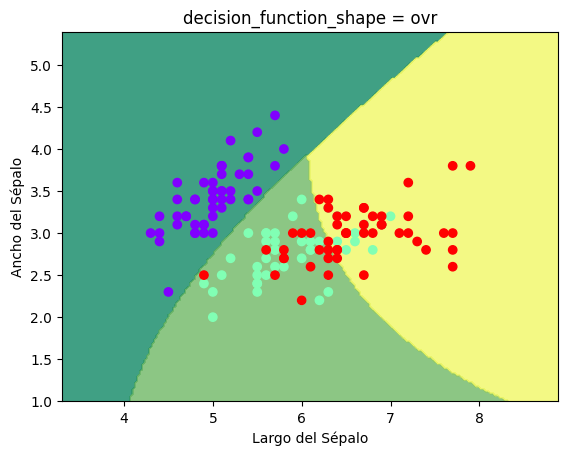

In [225]:
svc = svm.SVC(kernel='poly', decision_function_shape='ovr')
svc.fit(X, y)
plotSVC('decision_function_shape = ' + 'ovr')

<p style="color:blue; margin-top: 5px; font-weight: bold;">Fig. 8.9</p>

<p>Hiperplanos para distintos valores de forma.</p>

## Proyecto

Este proyecto utiliza un clasificador *SVM* para distinguir entre una voz masculina y una voz femenina dependiendo de las características acústicas de la muestra de voz. Tiene 19 características acústicas. El [](conjunto de datos) se obtiene de *Kaggle*. Use el método `info` para ver qué contiene. La salida se muestra en la figura 8.10.

In [226]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn import metrics

In [227]:
df=pd.read_csv('content/voice.csv')

In [228]:
df

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,0.131884,0.084734,0.153707,0.049285,0.201144,0.151859,1.762129,6.630383,0.962934,0.763182,...,0.131884,0.182790,0.083770,0.262295,0.832899,0.007812,4.210938,4.203125,0.161929,female
3164,0.116221,0.089221,0.076758,0.042718,0.204911,0.162193,0.693730,2.503954,0.960716,0.709570,...,0.116221,0.188980,0.034409,0.275862,0.909856,0.039062,3.679688,3.640625,0.277897,female
3165,0.142056,0.095798,0.183731,0.033424,0.224360,0.190936,1.876502,6.604509,0.946854,0.654196,...,0.142056,0.209918,0.039506,0.275862,0.494271,0.007812,2.937500,2.929688,0.194759,female
3166,0.143659,0.090628,0.184976,0.043508,0.219943,0.176435,1.591065,5.388298,0.950436,0.675470,...,0.143659,0.172375,0.034483,0.250000,0.791360,0.007812,3.593750,3.585938,0.311002,female


In [229]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

Las siguientes propiedades acústicas se utilizan como características:

- `meanfreq`: frecuencia media (en kHz)  
- `sd`: desviación estándar de la frecuencia  
- `median`: frecuencia mediana (en kHz)  
- `Q25`: primer cuantil (en kHz)  
- `Q75`: tercer cuantil (en kHz)  
- `IQR`: rango intercuartílico (en kHz)  
- `skew`: sesgo (ver nota en la descripción de *specprop*)  
- `kurt`: curtosis (ver nota en la descripción de *specprop*)  
- `sp.ent`: entropía espectral  
- `sfm`: planitud espectral  
- `mode`: frecuencia de moda  
- `centroid`: centroide de frecuencia (ver *specprop*)  
- `peakf`: frecuencia pico (frecuencia con mayor energía)  
- `meanfun`: promedio de la frecuencia fundamental medida a lo largo de la señal acústica  
- `minfun`: frecuencia fundamental mínima medida a lo largo de la señal acústica  
- `maxfun`: frecuencia fundamental máxima medida a lo largo de la señal acústica  
- `meandom`: promedio de la frecuencia dominante medida a lo largo de la señal acústica  
- `mindom`: frecuencia dominante mínima medida a lo largo de la señal acústica  
- `maxdom`: frecuencia dominante máxima medida a lo largo de la señal acústica  
- `dfrange`: rango de la frecuencia dominante medida a lo largo de la señal acústica  
- `modindx`: índice de modulación  

El objetivo está especificado por la columna `label`, que toma los valores `male` o `female`.

<p style="color:blue; margin-top: 5px; font-weight: bold;">Fig. 8.10</p>

<p>Información del Conjunto de Datos.</p>

In [230]:
df.isnull().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

Extracción de características y objetivos

In [231]:
X= df.iloc[:,:-1]
Y= df.iloc[:,-1]

Etiquetas de codificación

In [232]:
enc_gender = LabelEncoder()
y = enc_gender.fit_transform(Y)

Escalamiento

In [233]:
## Escala los datos para que estén entre -1 y 1
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
std_scaler.fit(X)
X = std_scaler.transform(X)

Creación de conjuntos de datos de entrenamiento y prueba

In [234]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

Después de realizar algo de preprocesamiento y crear los conjuntos de datos de entrenamiento/prueba, aplicamos el algoritmo de clasificador *SVM* con los valores predeterminados de los parámetros de la siguiente manera:  

In [235]:
svc_default = SVC()
svc_default.fit(X_train,y_train)

SVC()

Una vez que el modelo está entrenado, puede verificar su precisión en el conjunto de prueba.  

In [236]:
y_pred = svc_default.predict(X_test)
print("Accuracy Score:")
print(metrics.accuracy_score(y_test,y_pred)) 

Accuracy Score:
0.9763406940063092


En mi ejecución, obtuve una puntuación de precisión de 0.98, lo cual es extremadamente bueno. Para comprobar el efecto de diferentes *kernels* en la puntuación de precisión, realicé pruebas con distintos valores de *kernel*. Especificamos el valor del *kernel* como un parámetro en `SVC`, como se muestra aquí:

In [237]:
svc_linear=SVC(kernel='linear')
svc_linear.fit(X_train,y_train)
y_pred=svc_linear.predict(X_test)
print('Accuracy score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy score:
0.9779179810725552


In [238]:
svc_RBF= SVC(kernel='rbf')
svc_RBF.fit(X_train,y_train)
y_pred =svc_RBF.predict(X_test)
print("Accuracy score: ")
print(metrics.accuracy_score(y_test,y_pred))

Accuracy score: 
0.9763406940063092


In [239]:
svc_poly=SVC(kernel='poly')
svc_poly.fit(X_train,y_train)
y_pred=svc_poly.predict(X_test)
print('Accuracy score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy score:
0.9589905362776026


Como puede observar, la puntuación de precisión se mantiene más o menos igual en los tres casos; esto se debe principalmente a que el conjunto de datos está perfectamente equilibrado, con un 50/50 de puntos de datos para las categorías `male` y `female`.

### Matriz de Rendimiento

In [240]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', conf_matrix)

Confusion matrix

 [[290  21]
 [  5 318]]


In [241]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      female       0.98      0.93      0.96       311
        male       0.94      0.98      0.96       323

    accuracy                           0.96       634
   macro avg       0.96      0.96      0.96       634
weighted avg       0.96      0.96      0.96       634



## Ventajas y Desventajas

### Ventajas de *SVM*:

- Maneja datos no lineales de manera eficiente usando *kernel tricks*.  
- Un cambio menor en el conjunto de datos no afecta el hiperplano, por lo que el modelo se considera bastante estable.  
- Podemos usar el algoritmo tanto para clasificación (*SVC*) como para regresión (*SVR*).  
- El algoritmo tiene buenas capacidades de generalización gracias a la regularización *l2*, lo que previene el sobreajuste del modelo.  

### Desventajas:

- Elegir una función *kernel* apropiada es una tarea difícil. Especialmente, si se usa una alta dimensionalidad para un *kernel*, se pueden generar demasiados vectores de soporte, lo que resulta en velocidades de entrenamiento dramáticamente bajas.  
- Como el algoritmo es bastante complejo, los requisitos de memoria son muy altos. Esto se debe principalmente a que el algoritmo debe almacenar todos los vectores de soporte en memoria, y este número crece exponencialmente con el tamaño del conjunto de entrenamiento.  
- El algoritmo requiere que todas las características estén escaladas a una escala común antes de su aplicación.  
- Los tiempos de entrenamiento suelen ser muy largos, especialmente en conjuntos de datos grandes.  
- La salida de este algoritmo, que es un hiperplano, generalmente es difícil de entender e interpretar, a diferencia de los árboles de decisión, que pueden visualizarse e interpretarse fácilmente por humanos.

## Resumen
El algoritmo *SVM* encuentra un hiperplano óptimo para dividir el conjunto de datos en varias clases. Los hiperplanos no necesitan ser una línea recta simple, sino que pueden tener una forma compleja dependiendo del número de características y los valores objetivo. El algoritmo utiliza *kernel tricks* para encontrar el hiperplano óptimo. Se estudiaron los diversos tipos de *kernel* y el efecto de otros parámetros en la determinación del mejor hiperplano. *SVM* es un algoritmo muy popular y ampliamente utilizado para clasificación, y también puede usarse para tareas de regresión.  